# Imports

In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Topics

## Setup for building graphs

In [27]:
# Global color properties
graph_color = "#4986e8"
label_color = "#ffffff"
node_options = {
    'node_color': graph_color,
    'node_size': 1000,
    'edgecolors': 'black',
    'linewidths': 2,
}
edge_options = {
    'edge_color': graph_color,
    'width': 2.5,
    'alpha': 0.7,
}

# Helper function to draw any graph
def draw_graph(G, node_options, edge_options, edge_labels=None):
    """
    Draws the graph G with the specified node and edge options.
    
    Parameters:
        G (networkx.Graph): The graph to be drawn.
        node_options (dict): Options for drawing nodes.
        edge_options (dict): Options for drawing edges.
        edge_labels (dict, optional): Labels for the edges. Defaults to None.
    """

    # Define the layout of the graph
    pos = nx.spring_layout(G, iterations=10, seed=20000)

    # Draw the nodes with the specified options
    nx.draw_networkx_nodes(G, pos, **node_options)

    # Draw the node labels with specified font properties
    nx.draw_networkx_labels(
        G, pos, font_size=14, font_color=label_color, font_weight='bold'
    )

    # Draw the edges with the specified options
    nx.draw_networkx_edges(G, pos, **edge_options)

    # Draw edge labels if they are provided
    if edge_labels:
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels=edge_labels, 
            connectionstyle="arc3, rad=0.3",
            font_size=12,
            font_color="orange",
            bbox={"alpha": 1, "color": "white"}
        )

    # Turn off the axis and ensure the graph aspect ratio is equal
    plt.axis('off')
    plt.gca().set_aspect('equal')

    # Display the graph
    plt.show()

## Undirected graphs

In [28]:
# Adjacency matrix (randomly initialized)
np.random.seed(1)
n = 5
A = np.random.randint(2, size=(n, n))
print(f"Initial Matrix A =\n{A}")
# Include the self loop
np.fill_diagonal(A, 1)
print(f"Matrix A with self loop =\n{A}")
# Hack for creating a symmetric adjacency matrix
A = (A + A.T)
A[A > 1] = 1
print(f"Symmetric Matrix A =\n{A}")

Initial Matrix A =
[[1 1 0 0 1]
 [1 1 1 1 0]
 [0 1 0 1 1]
 [0 0 1 0 0]
 [0 1 0 0 1]]
Matrix A with self loop =
[[1 1 0 0 1]
 [1 1 1 1 0]
 [0 1 1 1 1]
 [0 0 1 1 0]
 [0 1 0 0 1]]
Symmetric Matrix A =
[[1 1 0 0 1]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 0]
 [1 1 1 0 1]]


Here’s a simple description of the connections between the nodes based on this matrix:

- Node 0 has edges to itself (0 → 0), to Node 1 (0 → 1), and to Node 4 (0 → 4).
- Node 1 is fully connected, with edges to all nodes, including itself. This means Node 1 has edges to Node 0 (1 → 0), Node 1 itself (1 → 1), Node 2 (1 → 2), Node 3 (1 → 3), and Node 4 (1 → 4).
- Node 2 has edges to Node 1 (2 → 1), itself (2 → 2), Node 3 (2 → 3), and Node 4 (2 → 4).
- Node 3 has edges to Node 1 (3 → 1), itself (3 → 2), and Node 2 (3 → 2).
- Node 4 has edges to Node 0 (4 → 0), Node 1 (4 → 1), Node 2 (4 → 2), and itself (4 → 4).


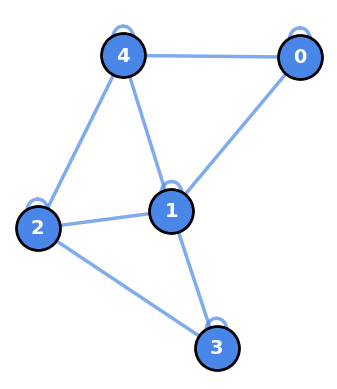

In [29]:
G = nx.from_numpy_array(A)

draw_graph(G, node_options, edge_options)

## Directed Graph

In [30]:
A = np.array([
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0]
])

- Node 0 has edges to Node 1 (0 → 1) and Node 3 (0 → 3).
- Node 1 has edges to Node 2 (1 → 2) and Node 4 (1 → 4).
- Node 2 has an edge to Node 3 (2 → 3).
- Node 3 has an edge to Node 4 (3 → 4).
- Node 4 has an edge to Node 0 (4 → 0), forming a cycle

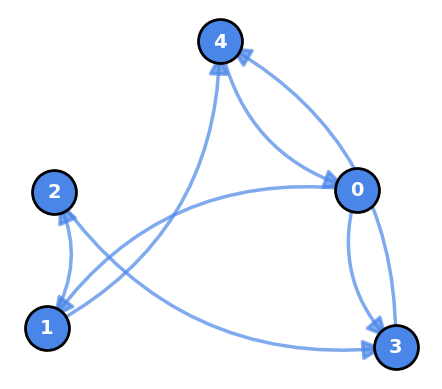

In [31]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph())

edge_options = {
    'edge_color': graph_color,
    'width': 2.5,
    'alpha': 0.7,
    'connectionstyle': 'arc3, rad = 0.3',
    'arrowstyle': '-|>',
    'arrowsize': 30
}

draw_graph(G, node_options, edge_options)

## Weighted Graph

In [32]:
A = np.array([
    [0, 2, 0, 3, 0],
    [0, 0, 1, 0, 4],
    [0, 0, 0, 5, 0],
    [0, 0, 0, 0, 6],
    [7, 0, 0, 0, 0]
])

- Node 0 has an edge to Node 1 with a weight of 2 (0 → 1, weight 2) and an edge to Node 3 with a weight of 3 (0 → 3, weight 3).
- Node 1 has an edge to Node 2 with a weight of 1 (1 → 2, weight 1) and an edge to Node 4 with a weight of 4 (1 → 4, weight 4).
- Node 2 has an edge to Node 3 with a weight of 5 (2 → 3, weight 5).
- Node 3 has an edge to Node 4 with a weight of 6 (3 → 4, weight 6).
- Node 4 has an edge to Node 0 with a weight of 7 (4 → 0, weight 7), forming a cycle.

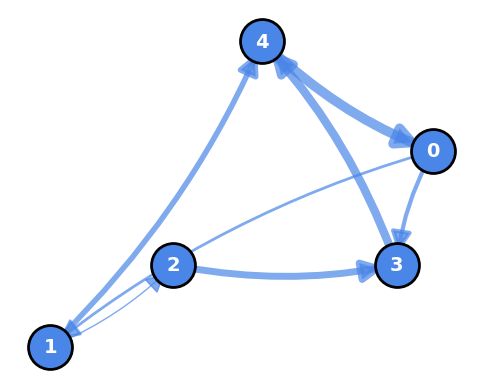

In [33]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph())
weights = nx.get_edge_attributes(G, 'weight')

edge_options = {
    'edge_color': graph_color,
    'width': 2.5,
    'alpha': 0.7,
    'connectionstyle': 'arc3, rad = 0.1',
    'arrowstyle': '-|>',
    'arrowsize': 30,
    'width': [weights[edge] for edge in G.edges()]
}

draw_graph(G, node_options, edge_options)

## Heterogeneous Graph

In [34]:
A = {
    'type1': np.array([
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0]
    ]),
    'type2': np.array([
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]
    ])
}

In [ ]:
# Create a heterogeneous graph using NetworkX
G = nx.MultiDiGraph()

# Add nodes
num_nodes = A['type1'].shape[0]
G.add_nodes_from(range(num_nodes))

# Add edges from each adjacency matrix
for edge_type, adj_matrix in A.items():
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i, j] != 0:
                G.add_edge(i, j, type=edge_type)
edge_labels = nx.get_edge_attributes(G,'type')

edge_options = {
    'edge_color': graph_color,
    'width': 2.5,
    'alpha': 0.7,
    'connectionstyle': 'arc3, rad = 0.3',
    'arrowstyle': '-|>',
    'arrowsize': 30,
}

draw_graph(G, node_options, edge_options, edge_labels=edge_labels)